<a href="https://colab.research.google.com/github/JOSEPHINEGEND/Moringa_Data_Science_Core_W3_Independent_Project_2019_08_Josephine_Wanjiku_Python_Notebook/blob/master/Moringa_Data_Science_Core_W3_Independent_Project_2019_08_Josephine_Wanjiku_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A PYTHON PROJECT TO UNDERSTAND ELECTRIC CAR USAGE


# 1.1 INTRODUCTION

## 1.1.1 Defining the question

In [0]:
# Investigating the electric (bluecars) car usage in Paris during weekdays.

# Test a Hypothesis: whether there is difference in the means of blue cars taken in two different postal codes selected randomly.

## 1.1.2 Metrics for success

In [0]:
# Exploratory Data Analysis
# Univariate, Bivariate Analysis
# Create Visualizations
# Testing a Hypothesis
# Challenging the solution.

## 1.1.3 Understanding the context

In [0]:
# In this project we will seek to understand electric car usage by solving for another research question.

# We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

# To do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method,

# Then perform hypothesis testing with regards to the claim that we will have made.

# An example of claim to test would be "Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z? Etc”. 

# The selected periods of interest be either weekdays or weekends but not a mix of both. 

# We can also consider postal codes as some of the areas of interest. 

## 1.1.4 The experimental design taken

In [0]:
# Exploratory Data Analysis
# Data Cleaning
# Univariate, Bivariate Analysis
# Visualizations
# Testing a Hypothesis
# Challenge our solution by providing insights on how we can make improvements.

## 1.1.5 Appropriateness of the data available

In [0]:
# Dataset

# The dataset to use for this project can be found here [http://bit.ly/DSCoreAutolibDataset]

# The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging)

# 1.2 EXPLORATORY DATA ANALYSIS

## 1.2.1 Importing Libraries

In [0]:
# Importing libraries we will use in this project

import pandas as pd

import numpy as np

import seaborn as sns  # Visualization library

import matplotlib.pyplot as plt # plotting library

%matplotlib inline

import pandas_profiling as pp

from scipy import stats

from scipy.stats import norm

from scipy.stats import t

import math

from scipy.stats import ttest_ind

from statsmodels.stats import weightstats as stests


## 1.2.2 Loading the Dataset

In [0]:
# We will call our dataset dfjos

dfjosw = pd.read_csv("http://bit.ly/DSCoreAutolibDataset")


## 1.2.3 Viewing the dataset

In [4]:
# Viewing the first five entries of our dataset

dfjosw.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [0]:
#  Viewing the last five entries of our dataset

dfjosw.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [0]:
# Checking the dataset information

dfjosw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [0]:
# Checking the dataset shape i.e. number of rows and columns

print('The Autolib dataset has ' + str(dfjosw.shape[0]) + ' rows and ' +  str(dfjos.shape[1]) + ' columns' )

The Autolib dataset has 16085 rows and 13 columns


In [0]:
# Checking the data types in our dataset

dfjosw.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [0]:
# Checking the columns names in our dataset

dfjosw.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [0]:
# Checking number of unique items in each column

dfjosw.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [0]:
# Here we can check a Summary description of our dataset

dfjosw.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [0]:
# Using Pandas Profiling to get a detailed summary report of our dataset

Summary = pp.ProfileReport(dfjosw)
Summary

Number of variables,13
Number of observations,16085
Total Missing (%),0.0%
Total size in memory,1.6 MiB
Average record size in memory,104.0 B
Numeric,5
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,6


# Partititioning our dataframe into weekdays only

In [0]:
# In this project we are required to work with either tha weekdays or the weekends.
# I choose weekdays


dfjos = dfjosw[dfjosw['day_type'] == 'weekday']

In [6]:
# printing the dataset shape
# viewing the new dataset
print(dfjos.shape)

dfjos.head()


(11544, 13)


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


# 1.3 DATA CLEANING

## 1.3.1 Fixing column names

In [0]:
# Removing spaces in the columns names

dfjos.columns = dfjos.columns.str.lower().str.replace(" ", "")


In [8]:
# confirming the columns names

dfjos.columns

Index(['postalcode', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [0]:
# Dropping columns we do not need for this analysis
# We are only dealing with Blue cars only for this project. 

dfjos.drop(['utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum'], axis = 1, inplace = True)

In [10]:
# confirming that we only have the relevant columns

dfjos.head()

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,18,20


## 1.3.2 Missing values

In [11]:
# Checking for missing values in our dataset by column

dfjos.isnull().sum()


# we have no missing values from the output below.

postalcode               0
date                     0
n_daily_data_points      0
dayofweek                0
day_type                 0
bluecars_taken_sum       0
bluecars_returned_sum    0
slots_freed_sum          0
slots_taken_sum          0
dtype: int64

## 1.3.3 Anomalies

In [12]:
# Checking for Anomalies

# checking for duplicates 

dfjos_duplicate = dfjos[dfjos.duplicated()]
dfjos_duplicate.shape


# There are no duplicates in all the rows.

(0, 9)

## 1.3.3 Outliers

### 1.3.3.1 Boxplots

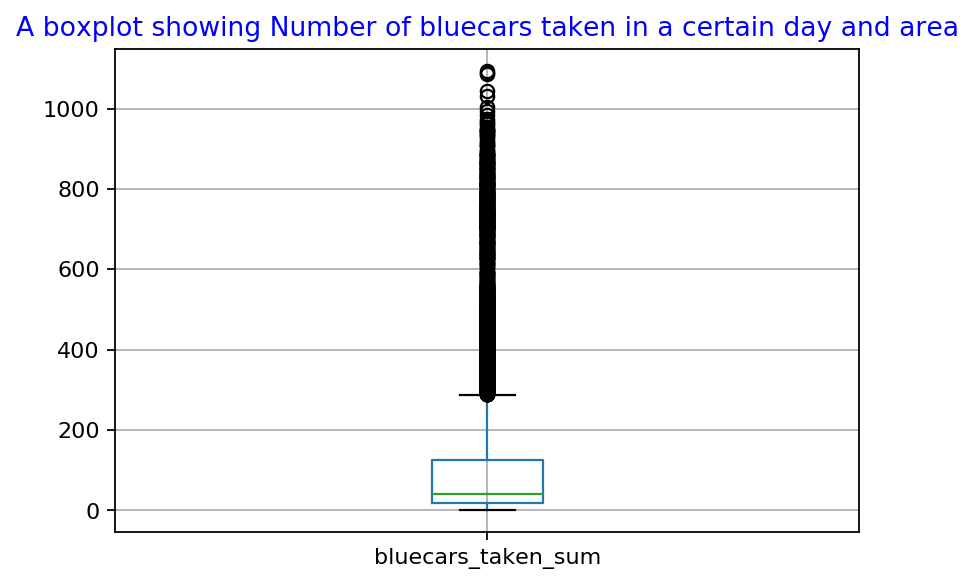

In [0]:
# Using box plots to check for outliers

# checking for outliers on the variable (bluecars_taken_sum) using boxplot

# Specifying the dots per inch in our chart
# Using pandas to create a boxplot
# Giving a title to our chart
# Displaying our chart



plt.figure(dpi = 160)
dfjos.boxplot(['bluecars_taken_sum'])
plt.title("A boxplot showing Number of bluecars taken in a certain day and area", color = 'blue')
plt.show()


# The boxplot shows profusion of outliers indicated by the black points.
# We will not remove them here.
# we shall investigate them instead.

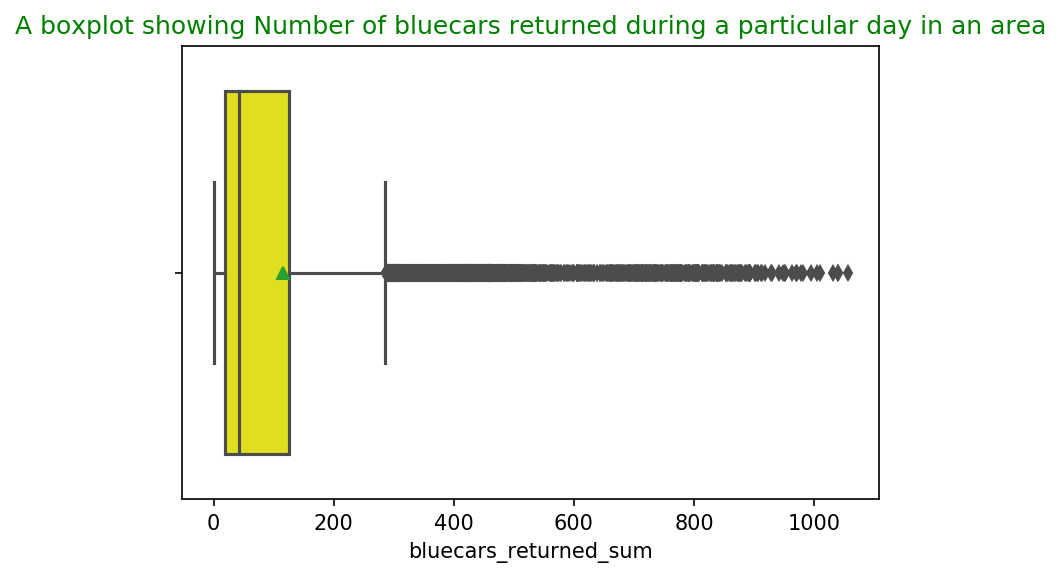

In [0]:
# Using box plots to check for outliers

# checking for outliers on the bluecars_returned_sum using boxplot

# Chart size specifications
# Using seaborn to create a boxplot
# Giving a title to our chart
# Displaying our chart



plt.figure(dpi = 150)
sns.boxplot(dfjos['bluecars_returned_sum'], showmeans = True , color = 'yellow')
plt.title("A boxplot showing Number of bluecars returned during a particular day in an area", color = 'Green')
plt.show()


# The boxplot shows profusion of outliers shown by the black shaded points
# We will not remove them here.
# we shall investigate them instead.


# 1.4 UNIVARIATE ANALYSIS

## 1.4.1 Visualizations

### 1.4.1.1 Histogram

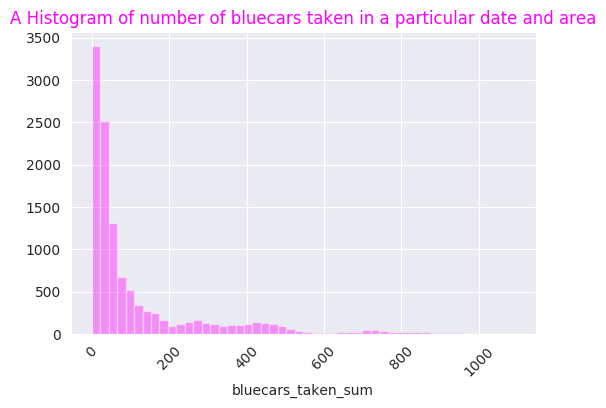

In [0]:
# Histogram of the bluecars_taken sum

# Using seaborn library to visaulize
# specifying the grid size and style settings
# Giving our chart a title
# Displaying the x axis at a 45 degree angle
# Displaying our chart


plt.figure(dpi = 100)
sns.set_style("darkgrid")
sns.distplot(dfjos["bluecars_taken_sum"], kde = False, color = 'magenta')
plt.title("A Histogram of number of bluecars taken in a particular date and area", color = 'magenta')
plt.xticks(rotation = 45)
plt.show()



# the histogram shows us that the blue cars taken distribution is skewed to the right
# this is because the tail is long to the right hand side



# In a perfect normal distribution, the tails on either side of the curve are exact mirror images of each other.

# When a distribution is skewed to the left, the tail on the curve’s left-hand side is longer than the tail on the right-hand side,
# and the mean is less than the mode. This situation is also called negative skewness.

# When a distribution is skewed to the right, the tail on the curve’s right-hand side is longer than the tail on the left-hand side, 
# and the mean is greater than the mode. This situation is also called positive skewness.

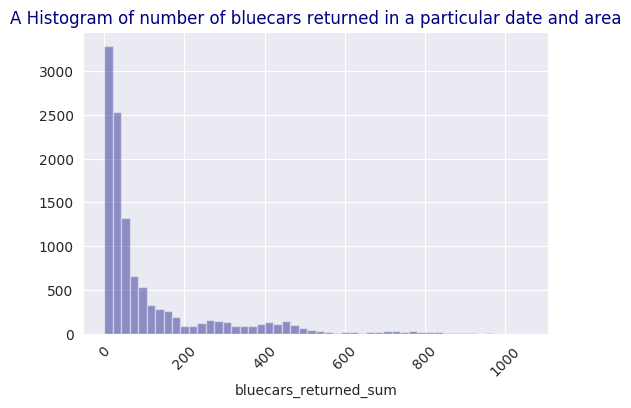

In [0]:
# Histogram of the bluecars_returned sum

# Using seaborn library to visualize
# specifying the grid size and style settings
# Giving our chart a title
# Displaying the x axis at a 45 degree angle
# Displaying our chart


plt.figure(dpi = 100)
sns.set_style("darkgrid")
sns.distplot(dfjos["bluecars_returned_sum"], kde = False, color = 'navy')
plt.title("A Histogram of number of bluecars returned in a particular date and area", color = 'navy')
plt.xticks(rotation = 45)
plt.show()


# the histogram shows us that the blue cars returned distribution is skewed to the right
# this is because the tail is long to the right side

### 1.4.1.2 Bar Charts

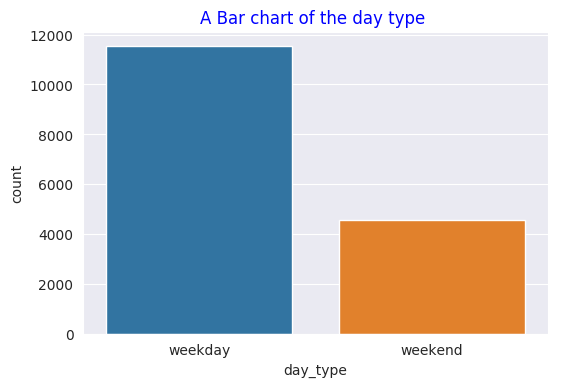

In [0]:
#  Plotting a bar plot of day_type	variable 
# NOTE: I used the original dataset to show the comparison between weekdays and weekends frequencies.

# Using seaborn to create a bar chart
# specifying our chart size
# Giving a title to our chart
# Displaying our chart

plt.figure(dpi = 100)
sns.set_style('darkgrid')
sns.countplot(dfjosw.day_type)
plt.title('A Bar chart of the day type ', color = 'blue')
plt.show()


# The bar chart shows that blue cars usage is more during weekdays than during the weekend.

In [0]:
# Converting the day of week from from numericals to strings for plotting
# Uning the mapping function
# 

dfjos['dayofweek'] = dfjos.dayofweek.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday'})


In [14]:
# Confirming that our dataset day_type columns was successfully converted to categories

dfjos.tail()

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
16078,95880,6/13/2018,1440,Wednesday,weekday,12,13,0,0
16079,95880,6/14/2018,1439,Thursday,weekday,15,13,0,0
16080,95880,6/15/2018,1440,Friday,weekday,15,10,0,0
16083,95880,6/18/2018,1440,Monday,weekday,11,14,0,0
16084,95880,6/19/2018,1370,Tuesday,weekday,2,2,0,0


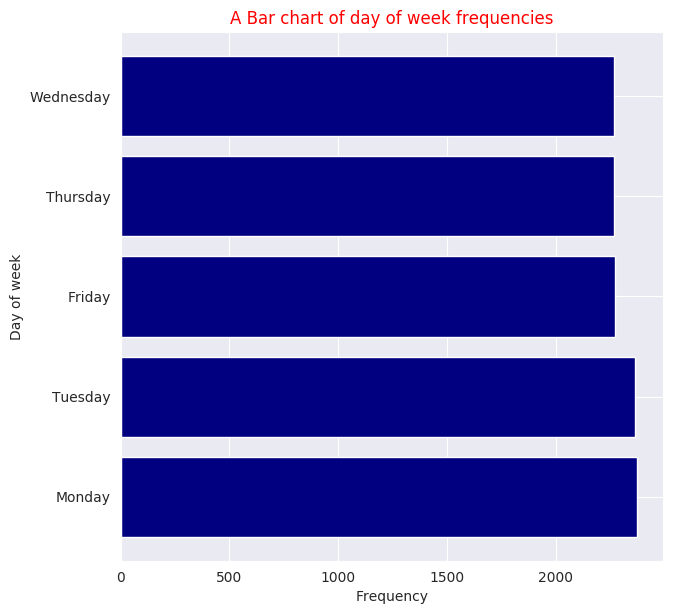

In [0]:
# # Plotting a horizontal bar plot of the day of week categories 

# grouping the data to be plotted

day = dfjos.dayofweek.value_counts()
day

# accessing the data to plot

# labels
sizes= day.index
sizes

# values
data = day.values
data

# Using matplotlib to create a bar chart
# specifying our chart size
# labeling the y axis
# labeling the x axis
# Giving a title to our chart
# Displaying our chart

plt.figure(figsize = (7,7), dpi = 100)
plt.barh(sizes, data, color = 'navy')
plt.ylabel("Day of week")
plt.xlabel('Frequency')
plt.title("A Bar chart of day of week frequencies", color = 'Red')
plt.show()

# from the horizontal bar chart, most activities involving picking, returning, and charging blues cars took place of Monday and Tuesday
# We shall check these activities this in a more defined way in our bivariate analysis.
# Also, lets see how a pie charts represents this information in the next step


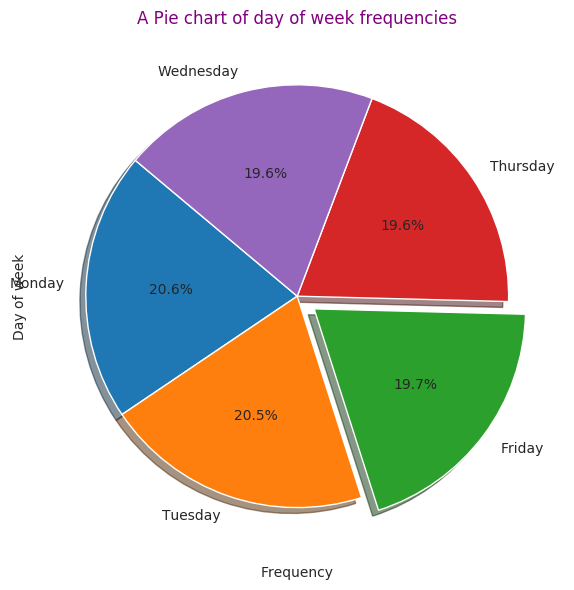

In [0]:
# # Plotting a Pie chart of the day of week categories 

# grouping the data to be plotted

day2 = dfjos.dayofweek.value_counts()
day2

# accessing the data to plot

# labels
sizes2= day.index
sizes2

# values
data2 = day.values
data2

# Using matplotlib to create a pie chart
# specifying our chart size
# labeling the y axis
# labeling the x axis
# Giving a title to our chart
# Displaying our chart

plt.figure(figsize = (7,7), dpi = 100)
plt.pie(data2, labels = sizes2, autopct = '%1.1f%%', shadow = True, explode = (0,0,0.1,0,0), startangle = 140)
plt.ylabel("Day of week")
plt.xlabel('Frequency')
plt.title("A Pie chart of day of week frequencies", color = 'purple')
plt.show()


# just like in the horizontal bar chart the activities (taking, returning, and charging) surrounding blue cars seem to be 
# equally the same throughout the week except
# on Mondays and Tuesdays where the seems to be slightly more activities compared to other days.

## 1.4.2 Frequency tables

In [0]:
# Frequency table of number of daily data points that were available for aggregation, that day 

# Making a crosstab
# Naming the count column

s = pd.crosstab(index = dfjos['n_daily_data_points'], columns = 'count')
s

# 1440 was the most frequent number of daily data points that were available for aggregation in most days

col_0,count
n_daily_data_points,
1174,104
1203,103
1320,103
1364,103
1370,94
1377,102
1389,103
1398,104
1411,104


In [0]:
# Frequency tables showing two or more variables 

# This is more of a bivariate analysis but it the best way to present the below tables,

# To provide better insights

In [0]:
# Frequency table of charging slots freed/released vs slots taken by day of the week


dfjos.groupby('dayofweek')[['slots_freed_sum', 'slots_taken_sum']].count()


# From the table the number of charging slots freed vs the slots taken is equal
# 

,slots_freed_sum,slots_taken_sum
dayofweek,,
Friday,2271,2271
Monday,2374,2374
Thursday,2268,2268
Tuesday,2363,2363
Wednesday,2268,2268


In [0]:
# Frequency table showing sums of bluecars taken vs bluecars returned by day of week

dfjos.groupby('dayofweek')[['bluecars_taken_sum' ,'bluecars_returned_sum']].sum()


# the sums are different
# this means that not all cars taken in day are returned the same day


,bluecars_taken_sum,bluecars_returned_sum
dayofweek,,
Friday,288546,286029
Monday,263893,264808
Thursday,263207,262961
Tuesday,261940,260470
Wednesday,261849,260673


In [0]:
# Frequency table showing sum of bluecars taken by day of week in ascending order.

dfjos.groupby('dayofweek')['bluecars_taken_sum'].sum().sort_values()



# Friday was when most blue cars were taken.
# while Wednesday was when the least number of blue cars were taken.

dayofweek
Wednesday    261849
Tuesday      261940
Thursday     263207
Monday       263893
Friday       288546
Name: bluecars_taken_sum, dtype: int64

In [0]:
# Frequency table showing sum of bluecars returned by day of week in ascending order.

dfjos.groupby('dayofweek')['bluecars_returned_sum'].sum().sort_values()



# Friday was when most blue cars were returned.
# while Tuesday was when the least number of blue cars were returned.

dayofweek
Tuesday      260470
Wednesday    260673
Thursday     262961
Monday       264808
Friday       286029
Name: bluecars_returned_sum, dtype: int64

In [0]:
# Frequency table showing sum of charging slots released by day of week in ascending order.

dfjos.groupby('dayofweek')['slots_freed_sum'].sum().sort_values()



# Friday was when most blue cars were released from charging slots.
# while Monday was when the least number of blue cars were released from charging slots.

dayofweek
Monday       47022
Tuesday      47095
Wednesday    47331
Thursday     48200
Friday       52143
Name: slots_freed_sum, dtype: int64

In [0]:
# Frequency table showing sum of charging slots taken by day of week in ascending order.

dfjos.groupby('dayofweek')['slots_taken_sum'].sum().sort_values()


# Friday was when most blue cars were taken to charge slots for charging.
# while Tuesday was when the least number of blue cars were taken to charge.

dayofweek
Tuesday      46969
Monday       47068
Wednesday    47223
Thursday     48023
Friday       52234
Name: slots_taken_sum, dtype: int64

In [0]:
# Frequency table of postal codes 
# In ascending order
#

dfjos.postalcode.value_counts().sort_values()


# There are quite a number of postal codes with the most number of times used.

# the least used postal code is 93390.

93390     59
93200     90
93370    105
92340    105
93150    107
93440    108
94410    111
75116    111
94100    111
92110    111
92360    111
91400    111
92250    112
93170    112
93130    112
92410    112
92370    112
92330    112
92290    112
92210    112
75018    112
92130    112
95880    112
75003    112
75010    112
75002    112
91370    112
91330    112
94800    112
92170    112
        ... 
94340    112
94450    112
92230    112
93800    112
94220    112
92300    112
94110    112
94150    112
93500    112
75013    112
75005    112
93300    112
93260    112
93100    112
92700    112
92500    112
94140    112
92420    112
92380    112
92260    112
92220    112
92140    112
92100    112
95870    112
75020    112
75012    112
75004    112
78150    112
93700    112
94160    112
Name: postalcode, Length: 104, dtype: int64

## 1.4.3 Measures of Central Tendency

In [0]:
# MEAN
# Mean or Average is a central tendency of the data i.e. a number around which a whole data is spread out. 


In [0]:
# Here we  will use for loops to make our work easier.
# Calculating mean of the target columns defined below.
# Defining our loop
# Specifying a space between each column's output
# Displaying the mean by column

cols = ['n_daily_data_points', 'bluecars_taken_sum', 'bluecars_returned_sum', 'slots_freed_sum',
       'slots_taken_sum']



for column in cols:
  print("\n")
  print('The mean ' + column + ' is : ' + str(dfjos[column].mean()))


  
  # The output below shows the mean/average of each of the target column/variable.
  # we can see that the average number of bluecars taken vs returned are nearly the same and 
  # the mean of freed slots vs taken charging slots.
  



The mean n_daily_data_points is : 1430.0072765072764


The mean bluecars_taken_sum is : 116.0286729036729


The mean bluecars_returned_sum is : 115.63937976437977


The mean slots_freed_sum is : 20.94516632016632


The mean slots_taken_sum is : 20.921431046431046


In [0]:
## MODE
# Mode is the term appearing maximum time in a given data set.
# It is the term that has highest frequency.

In [0]:
# Using for loops to find each variable's mode
# Defining our loop
# Specifying a space between each column's output
# Displaying the mode by column


for column in cols:
  print('\n')
  print('The Mode of ' + column + ' is ; ' + str(dfjos[column].mode()))
  
  
# The output below shows the mode of each of the variables of interest.
# the mode for bluecars returned vs taken is the same as well as the mode for the charging slots freed and taken.



The Mode of n_daily_data_points is ; 0    1440
dtype: int64


The Mode of bluecars_taken_sum is ; 0    12
dtype: int64


The Mode of bluecars_returned_sum is ; 0    12
dtype: int64


The Mode of slots_freed_sum is ; 0    0
dtype: int64


The Mode of slots_taken_sum is ; 0    0
dtype: int64


In [0]:
# Median
# Median is the value which divides the data in 2 equal parts;
# Number of terms on right side of it, is same as number of terms on left side of it when data is arranged in either ascending or descending order.

In [0]:
# Using for loops to find each variable's median
# Defining our loop
# Specifying a space between each column's output
# Displaying the median by column


for column in cols:
  print('\n')
  print('The median of ' + column + ' is ; ' + str(dfjos[column].median()))
  
  
# the output indicates the median value of each variable defined in our columns of interest.
# the median for bluecars returned vs taken is the same as well as the median for the charging slots freed and taken.



The median of n_daily_data_points is ; 1440.0


The median of bluecars_taken_sum is ; 42.0


The median of bluecars_returned_sum is ; 42.0


The median of slots_freed_sum is ; 0.0


The median of slots_taken_sum is ; 0.0


## 1.4.4 Measures of Dispersion/Spread/Variability

In [0]:
# RANGE

# It is the difference between lowest and highest value
# find maximum value 
# find minimum value
# range = max - min

In [0]:
# Using functions to find range for each target column
# Defining our function and parameters
# Calculating the maximum value
# Calculating the minimum value
# Calculating the range
# specify the return value as each column's range
# 

# Incorporating a for loop to calculate range over all the target columns
# Specifying spacing between each output
# Printing the the output as each column's range


def column_range(column):            
  max_value = dfjos[column].max()             
  min_value = dfjos[column].min()              
  col_range = max_value - min_value        
  return col_range                   

for column in cols:                              
  print('\n')                                                 
  print('The '+ column + ' range is: ' + str(column_range(column))) 
  
  
  
  
# The output shows the range for each column of interest here.



The n_daily_data_points range is: 266


The bluecars_taken_sum range is: 1093


The bluecars_returned_sum range is: 1056


The slots_freed_sum range is: 288


The slots_taken_sum range is: 294


In [0]:
## INTERQUARTILE RANGE

# QUANTILES

# Quartiles are values that divide the data into quarters when data is sorted in an ascending order.

# There are three quartile values. 

# Q1: First quartile is the 25 percentile. 
# Q2: Second quartile is the 50 percentile...also...median of the data
# Q3: Third quartile is the 75 percentile. 


# THE INTERQUARTILE RANGE ...also ..IQR

# IQR = Q3 -Q1

In [0]:
# Calculating the quartiles of each column in our cols list
# Using a for loop
# Specifying a space between each column's output
# Displaying the Quantiles by column in cols list


for column in cols:
  print('\n')
  print(dfjos[column].quantile([0.25, 0.5, 0.75]))
  
  
  
# The output indicates the first, second, and third quartiles for each column



0.25    1439.0
0.50    1440.0
0.75    1440.0
Name: n_daily_data_points, dtype: float64


0.25     18.0
0.50     42.0
0.75    126.0
Name: bluecars_taken_sum, dtype: float64


0.25     19.0
0.50     42.0
0.75    126.0
Name: bluecars_returned_sum, dtype: float64


0.25    0.0
0.50    0.0
0.75    4.0
Name: slots_freed_sum, dtype: float64


0.25    0.0
0.50    0.0
0.75    5.0
Name: slots_taken_sum, dtype: float64


In [0]:

# STANDARD DEVIATION

# Average distance between each obseravtion from the mean. 
# I.e., how data is spread out from mean. 
# A low std dev indicates that the data points tend to be close to the mean of the data set, 
# A high std dev indicates that the data points are spread out over a wider range of values.

In [0]:
# Calculating the Standard Deviation of each column in our cols list
# Using a for loop
# Specifying a space between each column's output
# Displaying the Standard Deviation by column in cols list

for column in cols:
  print('\n')
  print('The Standard Deviation of ' + column + ', is :  ' + str(dfjos[column].std()))
  
  
  
  
  
  ### The output shows the standard deviation for each target column.
  
  
  
### Comparing each column means with the standard deviation to see how the data is spread out:

  
  
# The mean n_daily_data_points is : 1430.0072765072764   ### Std Dev = 36.88213992449968  # data points tend to be close to the mean of the data set,


# The mean bluecars_taken_sum is : 116.0286729036729   ### Std Dev = 169.62690469970084   #  the data points are spread out over a wider range of values


# The mean bluecars_returned_sum is : 115.63937976437977   ### Std Dev = 168.34475125432746    #  the data points are spread out over a wider range of values


# The mean slots_freed_sum is : 20.94516632016632   ### Std Dev = 47.90020768290576    #  the data points are spread out over a wider range of values


# The mean slots_taken_sum is : 20.921431046431046     ### Std Dev = 47.84857983852817    #  the data points are spread out over a wider range of values
 



The Standard Deviation of n_daily_data_points, is :  36.88213992449968


The Standard Deviation of bluecars_taken_sum, is :  169.62690469970084


The Standard Deviation of bluecars_returned_sum, is :  168.34475125432746


The Standard Deviation of slots_freed_sum, is :  47.90020768290576


The Standard Deviation of slots_taken_sum, is :  47.84857983852817


In [0]:
## VARIANCE 

# It is the square of average distance between each observation and mean. 
# I.e. square of standard deviation. 
# It is a measure of how dispersed or spread out the set is, 

# If a data set has a variance of zero, then every member of it is the same. 
# If the variance is high, especially as a ratio to the mean, then the data have some very large dis-similarities amongst its members.

In [0]:
# Calculating the variance of each column in our cols list
# Using a for loop
# Specifying a space between each column's output
# Displaying the variance by column in cols list


for column in cols:
  print('\n')
  print('The Variance of ' + column + ', is :  ' + str(dfjos[column].var()))
  
  
  # From the outputs, all the variables have a  very high variance indicating that
  # the data in each column have some very large dis-similarities amongst its members.
  # except for n_daily data points which has a fairly smaller value compared to others.



The Variance of n_daily_data_points, is :  1360.2922454103737


The Variance of bluecars_taken_sum, is :  28773.286798001394


The Variance of bluecars_returned_sum, is :  28339.955274881388


The Variance of slots_freed_sum, is :  2294.4298960655037


The Variance of slots_taken_sum, is :  2289.4865925640042


In [0]:
## SKEWNESS 

# A measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. 
# In a perfect normal distribution, the tails on either side of the curve are exact mirror images of each other.
# A negative value means the distribution is negatively skewed.....or...skewed to the left
# A positive value means the distribution is positively skewed.....or...skewed to the right

In [0]:
# Calculating the Skewness of each column in our cols list
# Using a for loop
# Specifying a space between each column's output
# Displaying the Skewness by column in cols list


for column in cols:
  print('\n')
  print('The Skewness of ' + column + ', is :  ' + str(dfjos[column].skew()))
  
  
  
# from the output, n_daily_data_points data distribution is skewed to the left since it has a negative value
# Others: bluecars_taken_sum, bluecars_returned_sum, slots_freed_sum,  and  slots_taken_sum have a positive value indicating that
# they data distributions are skewed to the right.
# this was also evident in the histograms plotted above.



The Skewness of n_daily_data_points, is :  -5.449575600011862


The Skewness of bluecars_taken_sum, is :  2.3281979815185876


The Skewness of bluecars_returned_sum, is :  2.3289726516394973


The Skewness of slots_freed_sum, is :  2.5421869688795278


The Skewness of slots_taken_sum, is :  2.5423463886866187


In [0]:
# KURTOSIS 

# A measure of whether the data are heavy-tailed (profusion of outliers)
# or light-tailed (lack of outliers) relative to a normal distribution.
# If the kurtosis is close to 0, then a normal distribution is often assumed....These are called mesokurtic distributions.                        
# If the kurtosis is less than zero, then the distribution has light tails ......called a platykurtic distribution.  
# If the kurtosis is greater than zero, then the distribution has heavier tails .... called a leptokurtic distribution.

In [0]:
# Calculating the Kurtosis of each column in our cols list
# Using a for loop
# Specifying a space between each column's output
# Displaying the Kurtosis by column in cols list


for column in cols:
  print('\n')
  print('The Kurtosis of ' + column + ', is :  ' + str(dfjos[column].kurt()))

 # The kurtosis value in all the columns are greater than zero, 
# Therefore their distributions have heavier tails .... called a leptokurtic distributions
# they all have a profusion of outliers
# Just like we saw in the boxplots earlier.



The Kurtosis of n_daily_data_points, is :  31.654407529009344


The Kurtosis of bluecars_taken_sum, is :  5.553808116768028


The Kurtosis of bluecars_returned_sum, is :  5.5428632223425325


The Kurtosis of slots_freed_sum, is :  6.007229901401457


The Kurtosis of slots_taken_sum, is :  6.001264705133703


# 1.5 BIVARIATE ANALYSIS

In [0]:
# Analysis of two different variables to find their causes and relationships between them.

## 1.5.1 Visualizations

### 1.5.1.1 Scatter Plots

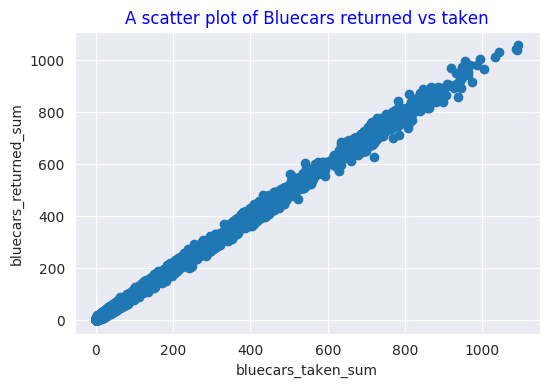

In [0]:
# Using Matplotlib: Plotting our scatterplot to compare two numerical the variables

# Specifying the chart size

plt.figure(dpi = 100)

# plotting our scatterplot using matplotlib
plt.scatter(dfjos['bluecars_taken_sum'], dfjos['bluecars_returned_sum'])

# Giving the scatterplot a title
plt.title('A scatter plot of Bluecars returned vs taken', color = 'blue')

# Labelling the x axis
plt.xlabel('bluecars_taken_sum')

# Labelling the y axis
plt.ylabel('bluecars_returned_sum')

# We then display our scatterplot 
plt.show()




# There is strong positive correlation between Bluecars returned vs taken.
# As the blue cars taken increases, the bluecar returned also increases.
# 

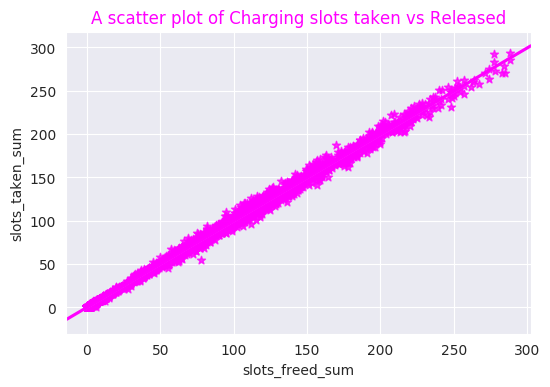

In [0]:
# Using Seaborn: 

# Specifying the dots per inch
# Using the function regplot from Seaborn to create our scatterplot
# creating a title for our scatter plot
# displaying the scatter plot


plt.figure(dpi = 100)
sns.regplot(x = dfjos["slots_freed_sum"], y = dfjos["slots_taken_sum"], fit_reg=True, color = 'magenta', marker = '*')
plt.title("A scatter plot of Charging slots taken vs Released", color = 'magenta')
plt.show()



# There is strong positive correlation between charging slots taken vs released.
# As the charging slots are released increases, the taken charging also increases.
# 

### 1.5.1.2 Line Charts

In [0]:
# To plot a meaningful line chart,
# I will use simple random sampling techinique to select a representative sample of the data
# Since there are too many observations to plot a line chart.


# then I will use stratified sampling to select a sample dataset for by each month.


# then I will plot a line chart and a stacked bar chart

# **SIMPLE RANDOM SAMPLING**

In [0]:
# A simple random sample is a subset of a statistical population 
# in which each member of the subset has an equal probability of being chosen. 
# A simple random sample is meant to be an unbiased representation of a group.

# Major advantages include its simplicity and lack of bias.


In [0]:
# creating a new dataframe containing our simple random sample 
# sample size = 3000
# the sample will be selected without replacement


dfjos1 = dfjos.sample(n = 3000, replace = 'False')


In [18]:
# Confriming the size of our sample
# viewing the head of the created sample


print(dfjos1.shape)

dfjos1.head()



(3000, 9)


,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
1353,75009,4/19/2018,1203,Thursday,weekday,299,291,50,52
14549,94300,1/24/2018,1434,Wednesday,weekday,33,32,0,0
113,75001,4/27/2018,1440,Friday,weekday,102,102,20,20
6109,92210,1/29/2018,1440,Monday,weekday,92,93,0,0
12617,93600,5/2/2018,1440,Wednesday,weekday,15,18,0,0


In [0]:
## converting the date column to datetime format 
#  We will extract the month for plotting purposes

dfjos1['date'] = pd.to_datetime(dfjos1.date)

# **STRATIFIED SAMPLING**

In [0]:
# Stratified Sampling
# Stratified sampling refers to a type of sampling method. 
# With stratified sampling, the researcher divides the population into separate groups, called strata. 
# Then, a probability sample (often a simple random sample ) is drawn from each group.

# Stratified sampling has several advantages over simple random sampling. 
# For example, using stratified sampling, 
# it may be possible to reduce the sample size required to achieve a given precision. 
# Or it may be possible to increase the precision with the same sample size.

In [0]:
# creating a new column called month
# we shall use the column month to select our stratifies sample by each month

dfjos1['month'] = pd.DatetimeIndex(dfjos1['date']).month  

In [21]:
# checking the new column created

dfjos1.head()

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum,month
1353,75009,2018-04-19,1203,Thursday,weekday,299,291,50,52,4
14549,94300,2018-01-24,1434,Wednesday,weekday,33,32,0,0,1
113,75001,2018-04-27,1440,Friday,weekday,102,102,20,20,4
6109,92210,2018-01-29,1440,Monday,weekday,92,93,0,0,1
12617,93600,2018-05-02,1440,Wednesday,weekday,15,18,0,0,5


In [0]:
# Selecting a stratified sample 
# By month of the year.

strat_sample = dfjos1.groupby(['month'],group_keys = False).apply(lambda month : month.sample(frac = 0.5))



In [23]:
# checking the new stratified sample selected

print(strat_sample.shape)

strat_sample.head()

(1500, 10)


,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum,month
14087,94160,2018-01-30,1440,Tuesday,weekday,49,53,2,2,1
14065,94160,2018-01-08,1438,Monday,weekday,51,49,0,0,1
804,75006,2018-01-25,1398,Thursday,weekday,254,252,51,50,1
9983,93100,2018-01-17,1440,Wednesday,weekday,120,102,5,5,1
15482,94800,2018-01-22,1440,Monday,weekday,69,65,0,0,1


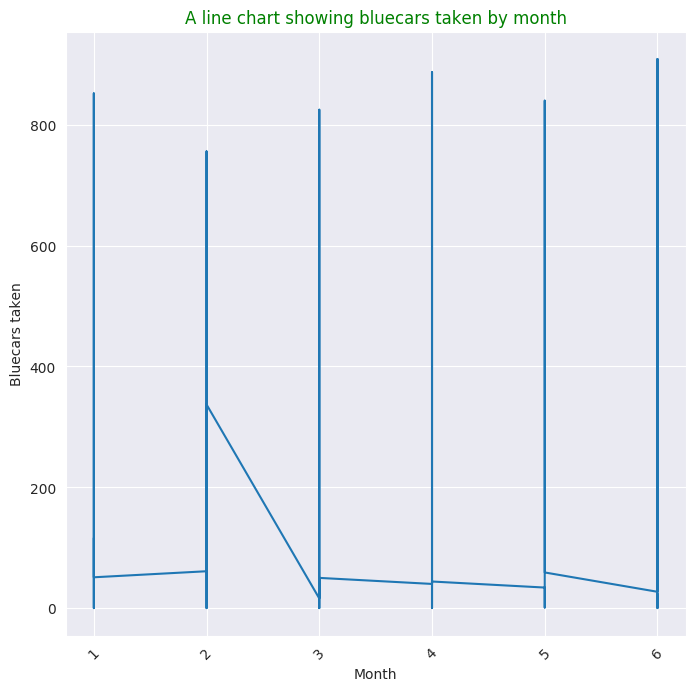

In [0]:
# Plotting a line chart using the selected sample dataframe

# Line chart of the bluecars taken by month


# figure size specifications
# creating a line chart using matplotlib
# Rotating our x axis ticks
# labelling the title
# labelling the x axis
# labelling the y axis
# Displaying our chart



plt.figure(figsize = (8,8), dpi = 100)
plt.plot(strat_sample.month, strat_sample.bluecars_taken_sum)
plt.xticks(rotation = 45)
plt.title('A line chart showing bluecars taken by month', color = 'Green')
plt.xlabel('Month')
plt.ylabel('Bluecars taken')
plt.show()



# the line chart below shows an unfamiliar trend.

### 1.5.1.3 Pearson correlation

In [0]:
# Correlation


# It is a statistical measure that describes the association between random variables.

# Calculate the pearson correlation coefficient; It is the most widely used correlation coefficient.

# Positive correlation is a relationship between two variables in which both variables move in tandem i.e. in the same direction.

# Negative correlation/ inverse correlation is a relationship between two variables whereby they move in opposite directions. 

# Correlation coefficients between -.20 and .20 are generally considered weak, 

# Between .20 and .50 (positive or negative) are considered moderate, 

# Above.50 (positive or negative) are considered strong.

In [0]:
# Calculating the pearson coefficient of the entire dataframe

dfjos.corr()

,postalcode,n_daily_data_points,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
postalcode,1.000000,0.000432,-0.698020,-0.697519,-0.749528,-0.749157
n_daily_data_points,0.000432,1.000000,0.029411,0.030063,0.020873,0.021169
bluecars_taken_sum,-0.698020,0.029411,1.000000,0.998660,0.948575,0.947996
bluecars_returned_sum,-0.697519,0.030063,0.998660,1.000000,0.948258,0.948771
slots_freed_sum,-0.749528,0.020873,0.948575,0.948258,1.000000,0.999221
slots_taken_sum,-0.749157,0.021169,0.947996,0.948771,0.999221,1.000000


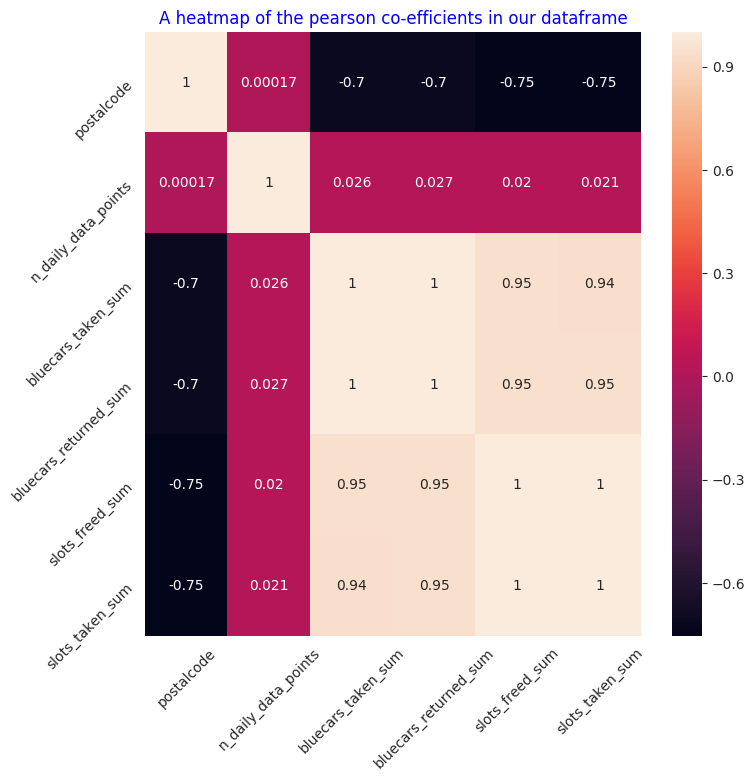

In [0]:
# Heatmap


# defining our data
# figure size specifications
# using the Seaborn Visualization library
# Rotating our x axis ticks
# Rotating our y axis ticks
# labelling the title
# displaying our chart


x = dfjos.corr()
plt.figure(figsize = (8,8), dpi = 100)
sns.heatmap(x, xticklabels = x.columns, yticklabels=x.columns, annot = True)
plt.title('A heatmap of the pearson co-efficients in our dataframe', color = "blue")
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()



# The brighter regions show strong positive correlation between variables.
# For example there is a strong positive correlation (0.99) between bluecars_taken_sum and bluecars_returned_sum, &	slots_freed_sum and slots_taken_sum

# 1.6 HYPOTHESIS TESTING 

In [0]:
# Hypothesis testing is a statistical method that is used in making statistical decisions using experimental data. 
# Hypothesis Testing is basically an assumption that we make about the population parameter.

#### DEFINITION OF TERMS

# Null hypothesis Ho:- In inferential statistics, the null hypothesis is a general statement or
# default position that there is no relationship between two measured phenomena, or no association among groups.
# In other words it is a basic assumption or made based on domain or problem knowledge.


# Alternative hypothesis Ha/H1:-
# The alternative hypothesis is the hypothesis used in hypothesis testing that is contrary to the null hypothesis.
# It is usually taken to be that the observations are the result of a real effect (with some amount of chance variation superposed)


# Level of significance:
# Refers to the degree of significance in which we accept or reject the null-hypothesis. 
# 100% accuracy is not possible for accepting or rejecting a hypothesis, 
# so we therefore select a level of significance that is usually 5%.
# This is normally denoted with alpha(maths symbol ) and generally it is 0.05 or 5% , 
# which means your output should be 95% confident to give similar kind of result in each sample.


# Type I error: 
# When we reject the null hypothesis, although that hypothesis was true. Type I error is denoted by alpha.


# Type II errors: 
# When we accept the null hypothesis but it is false. Type II errors are denoted by beta. 

# One tailed test :-
# A test of a statistical hypothesis , where the region of rejection is on only one side of the sampling distribution
# It can be right or left tail; determined by the alternative hypothesis

# Two-tailed test :- 
# A two-tailed test is a statistical test in which the critical area of a distribution is two-sided 


# P-value :- 
# The P value, or calculated probability, 
# is the probability of finding the observed, or more extreme, results when the null hypothesis (H 0) of a study question is true
# If your P value is less than the chosen significance level then you reject the null hypothesis i.e. 
# accept that your sample gives reasonable evidence to support the alternative hypothesis. 


In [0]:
# T- Test :-
# A t-test is a type of inferential statistic which is used to
# determine if there is a significant difference between the means of two groups which may be related in certain features.
# T-test has 2 types : 1. one sampled t-test 2. two-sampled t-test.

# Two sampled T-test :-The Independent Samples t Test or 2-sample t-test 
# compares the means of two independent groups in order to 
# determine whether there is statistical evidence that the associated population means are significantly different. 
# The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test.

# Paired sampled t-test :- 
# The paired sample t-test is also called dependent sample t-test.
# It’s a univariate test that tests for a significant difference between 2 related variables.

In [0]:
# Z Test.

## When to use Z test

# Your sample size is greater than 30. Otherwise, use a t test.

# Data points should be independent from each other. i.e, one data point isn’t related or doesn’t affect another data point.

# Your data should be normally distributed. However, for large sample sizes (over 30) this doesn’t always matter.

# Your data should be randomly selected from a population, where each item has an equal chance of being selected.

# Sample sizes should be equal if at all possible.



In [0]:
# Using a Z test to conduct our Hypothesis.
# It is the appropriate test to use here since we have a dataset larger than 30 observations.
# 

In [27]:
# Selecting two postal codes using simple random sampling

h_sample = dfjos.sample(n = 2, replace = False)
h_sample

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
1737,75012,1/22/2018,1440,Monday,weekday,415,418,138,141
934,75006,6/18/2018,1440,Monday,weekday,225,226,40,40


In [0]:
# STEP 1

# Stating the Hypothesis


# H0 : The difference in the mean of blue cars taken in postal code 75006 and 75012 is 0
# H1 : The difference in the mean of blue cars taken in postal code 75006 and 75012 is not 0


## OR


# H0 : U1 = U2
# Ha : U1 ≠ U2

In [0]:
# STEP 2

# Level of significance
# α = 0.05


In [28]:
# Creating a dataframe containing the 75012 postal code as p1

p1 = dfjos[dfjos['postalcode'] == 75012]
p1.head()

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
1716,75012,1/1/2018,1440,Monday,weekday,502,512,122,120
1717,75012,1/2/2018,1438,Tuesday,weekday,406,412,109,109
1718,75012,1/3/2018,1439,Wednesday,weekday,427,423,92,95
1719,75012,1/4/2018,1320,Thursday,weekday,395,392,91,94
1720,75012,1/5/2018,1440,Friday,weekday,476,478,114,118


In [29]:
# Creating a dataframe containing the 75006 postal code as p2

p2 = dfjos[dfjos['postalcode'] == 75006]
p2.head()

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
780,75006,1/1/2018,1440,Monday,weekday,215,197,34,31
781,75006,1/2/2018,1438,Tuesday,weekday,190,192,34,38
782,75006,1/3/2018,1439,Wednesday,weekday,208,207,30,25
783,75006,1/4/2018,1320,Thursday,weekday,176,179,32,30
784,75006,1/5/2018,1440,Friday,weekday,262,261,49,45


In [31]:
# # STEP 3

# Calculating the test statistic
# Applying the conditions for an appropriate decision.

ztest , pval1 = stests.ztest(p1['bluecars_taken_sum'], x2= p2['bluecars_taken_sum'], value=0, alternative='two-sided')

print(float(pval1))

if pval1 < 0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

3.571771542382906e-172
reject null hypothesis


In [0]:
# STEP 4 

# Evaluating our results

# The p-value = 3.571771542382906e-172

# this p-value is a very small value and it is less that the level of significance (0.05)

# Hence we Reject the Null Hypothesis



In [0]:
# STEP 5

# Interpreting the results

# There is sufficient evidence to conclude that the difference in the means of blue cars taken in postal code 75012 and 75006 is not 0.

# The test was statistically significant.

# 1.7 CHALLENGING THE SOLUTION